# Using FFT the right way to find the correct spectrum


In [1]:
from numpy import *
from numpy.fft import fft
import matplotlib.pyplot as plt
%matplotlib inline

# redefine default figure size and fonts
import matplotlib as mpl
mpl.rc('font', size=16)
mpl.rc('figure',figsize=(12,10))
mpl.rc('lines', linewidth=1, color='lightblue',linestyle=':',marker='o')

In [2]:
import sys
sys.path.append('../../scripts')
from signal_processing import create_signal, spectrum

In [3]:
fs = 30 # sampling frequency, Hz
N = 256 # number of sampling points

t,y = create_signal(fs,N)

In [4]:
def plot_signal_with_fft(t,y,fs,N):
    """ plots a signal in time domain and its spectrum using 
    sampling frequency fs and number of points N
    """

    T = N/fs # sampling period
    y -= y.mean() # remove DC
    frq,Y = spectrum(y,fs) # FFT(sampled signal)
    
    # Plot
    fig, ax = plt.subplots(2,1)
    ax[0].plot(t,y,'b.')
    ax[0].plot(t,y,':',color='lightgray')
    ax[0].set_xlabel('$t$ [s]')
    ax[0].set_ylabel('Y [V]')
    ax[0].plot(t[0],y[0],'ro')
    ax[0].plot(t[-1],y[-1],'ro')
    ax[0].grid()

    
    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('$f$ (Hz)')
    ax[1].set_ylabel('$|Y(f)|$')
    lgnd = str(r'N = %d, f = %d Hz' % (N,fs))
    ax[1].legend([lgnd],loc='best')
    ax[1].grid()

In [5]:
### Note we remove DC right before the spectrum

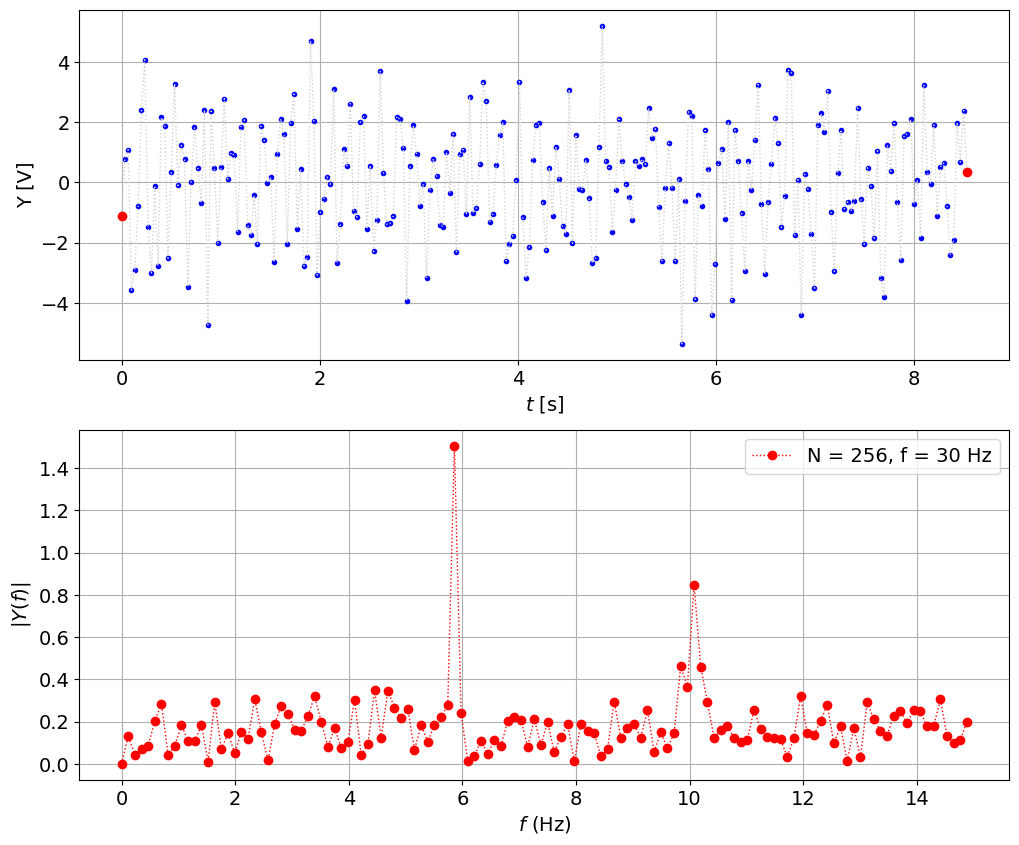

In [6]:
plot_signal_with_fft(t,y,fs,N)

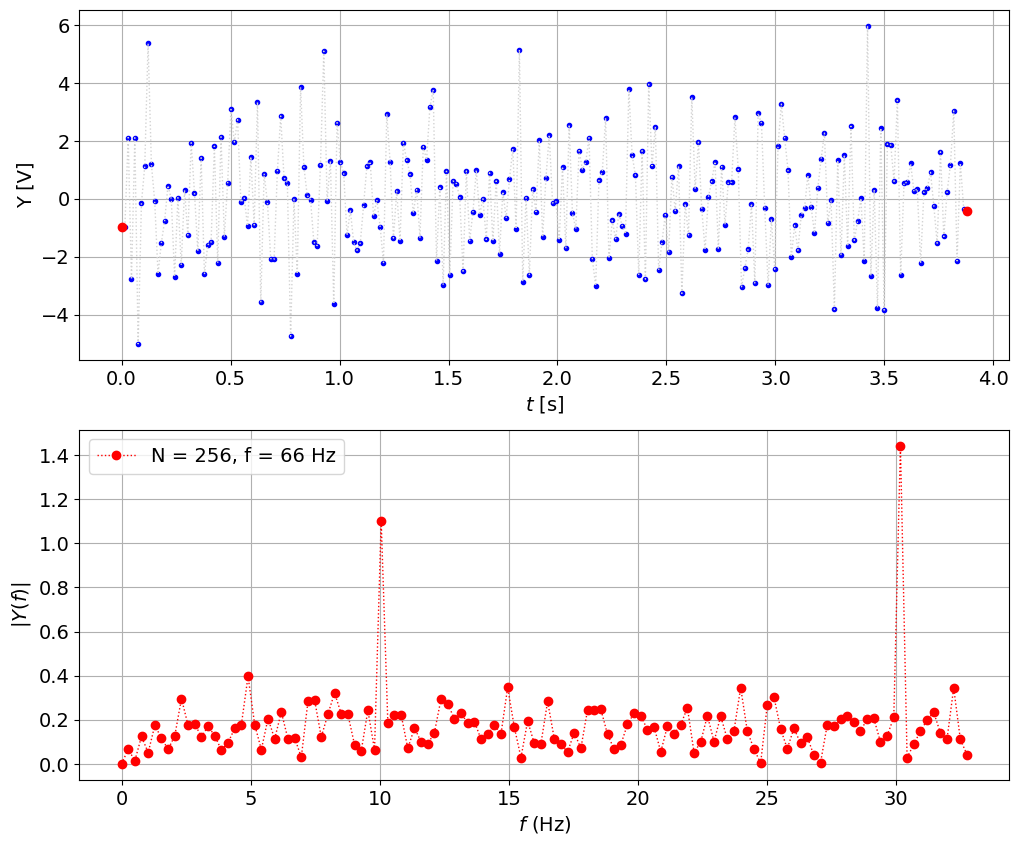

In [7]:
fs = 66 # sampling frequency, Hz
N = 256 # number of sampling points

t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)

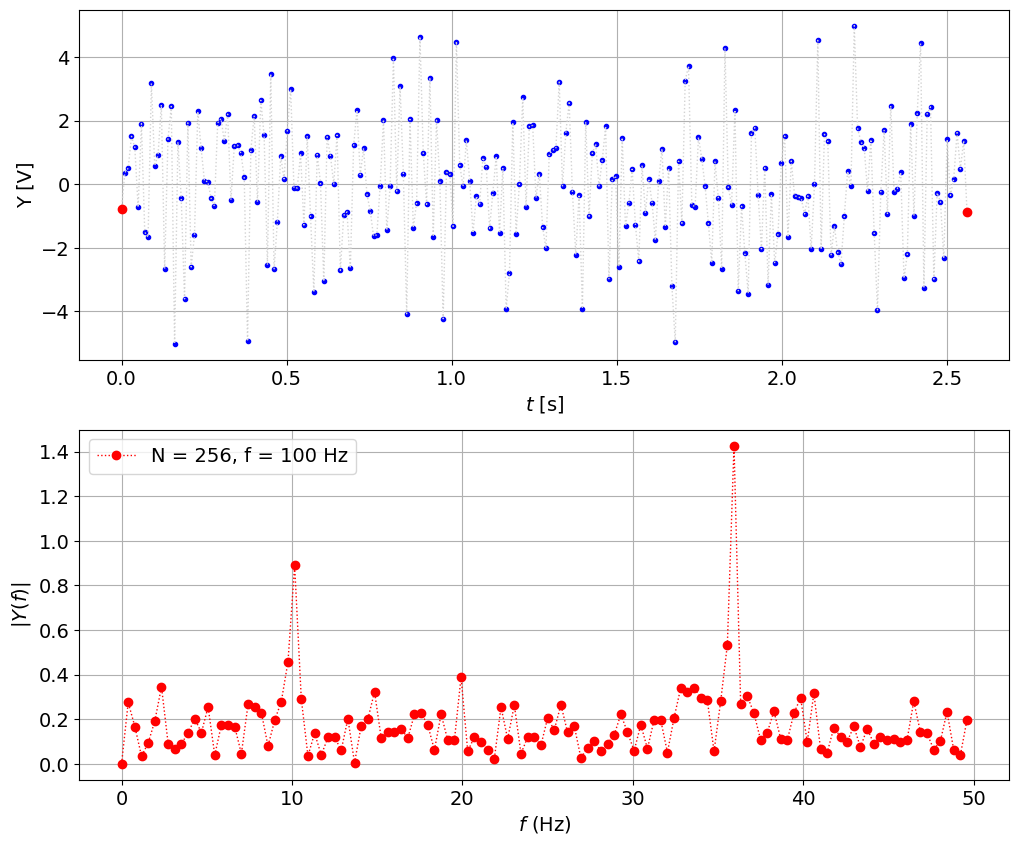

In [8]:
fs = 100 # sampling frequency, Hz
N = 256 # number of sampling points

t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)

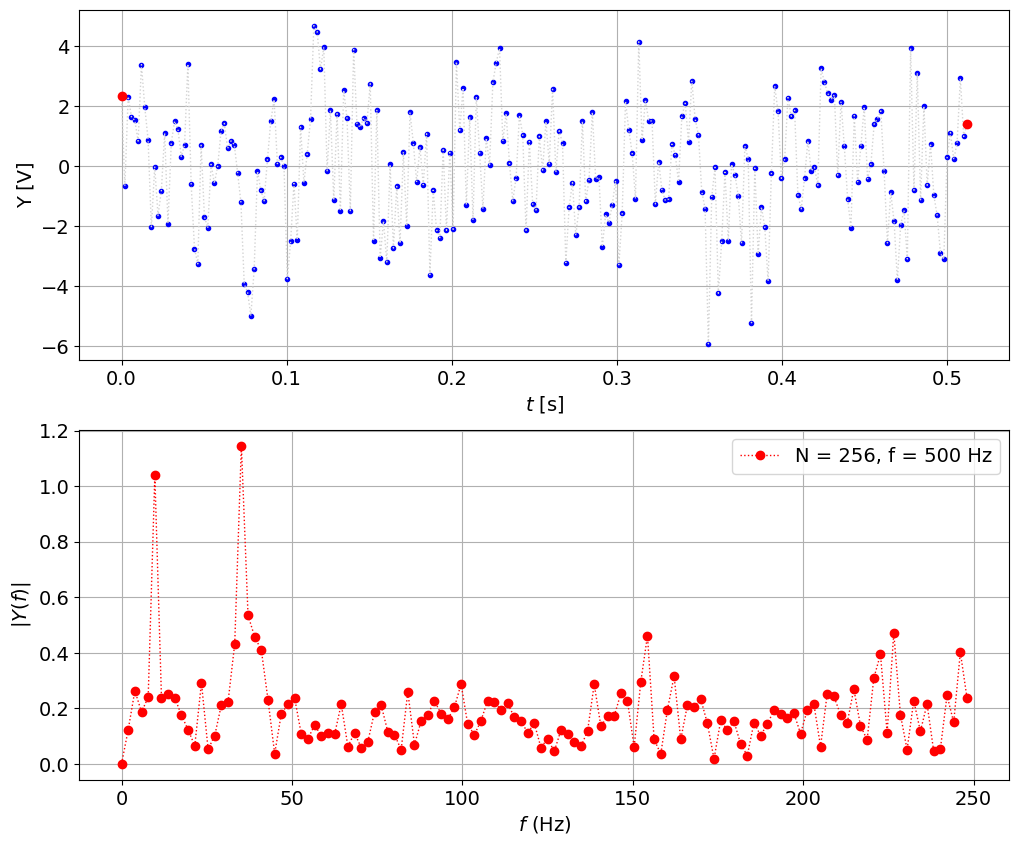

In [9]:
fs = 500 # sampling frequency, Hz
N = 256 # number of sampling points

t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)

* Very poor frequency resolution, $\Delta f = 1/T = fs/N = 500 / 256 = 1.95 Hz$ versus $\Delta f = 100 / 256 = 0.39 Hz$
* peaks are at 9.76 Hz and 35.2 Hz 
* wasting a lot of frequency axis above 2 * 35.7

## So the problem is still there:
the peak is now shifted to 35.5 Hz, let's see: when we sampled at 30 we got aliased 35.5 - 30 = 5.5 Hz. Seems correct,
when we sampled at 66 it was above 2/3*f but below 2*f, so 66 - 35.5 = 30.5 Hz, also seem to fit. So now we have explained (!)
the previous results and we believe that hte signal has 10 Hz and 35.5 Hz (approximately) and 100 Hz is good enough
but we could improve it by going slightly above Nyquist 2*35.5 = 71 Hz, and also try to fix the number of points such that
we get integer number of periods. It's imposible since we have two frequencies, but at least we can try to get it close
enough: 1/10 = 0.1 sec so we could do 256 * 0.1 = 25.6 Hz or X times that = 25.6 * 3 = 102.4 - could be too close
let's try:

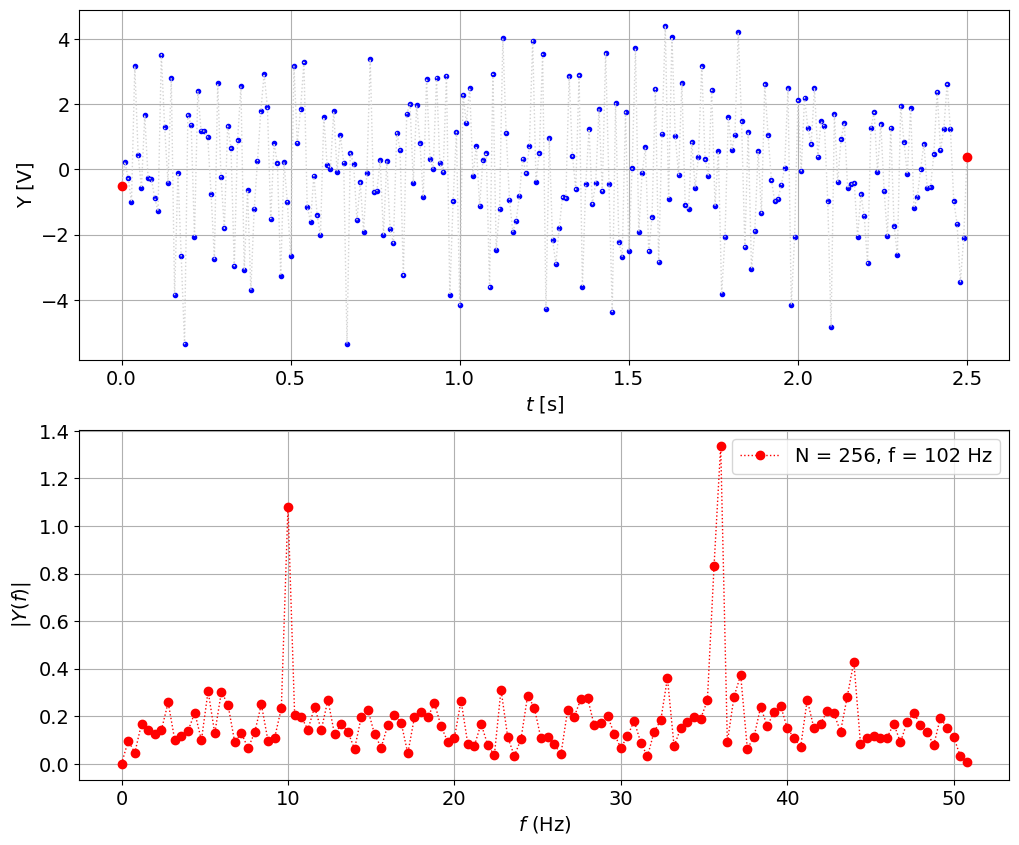

In [10]:
fs = 102.4 # sampling frequency, Hz
N = 256 # number of sampling points
t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)


Then the same principle to get better 35.5 Hz
1/35.5 * 256 = 7.21 * 15 = 108.16 Hz

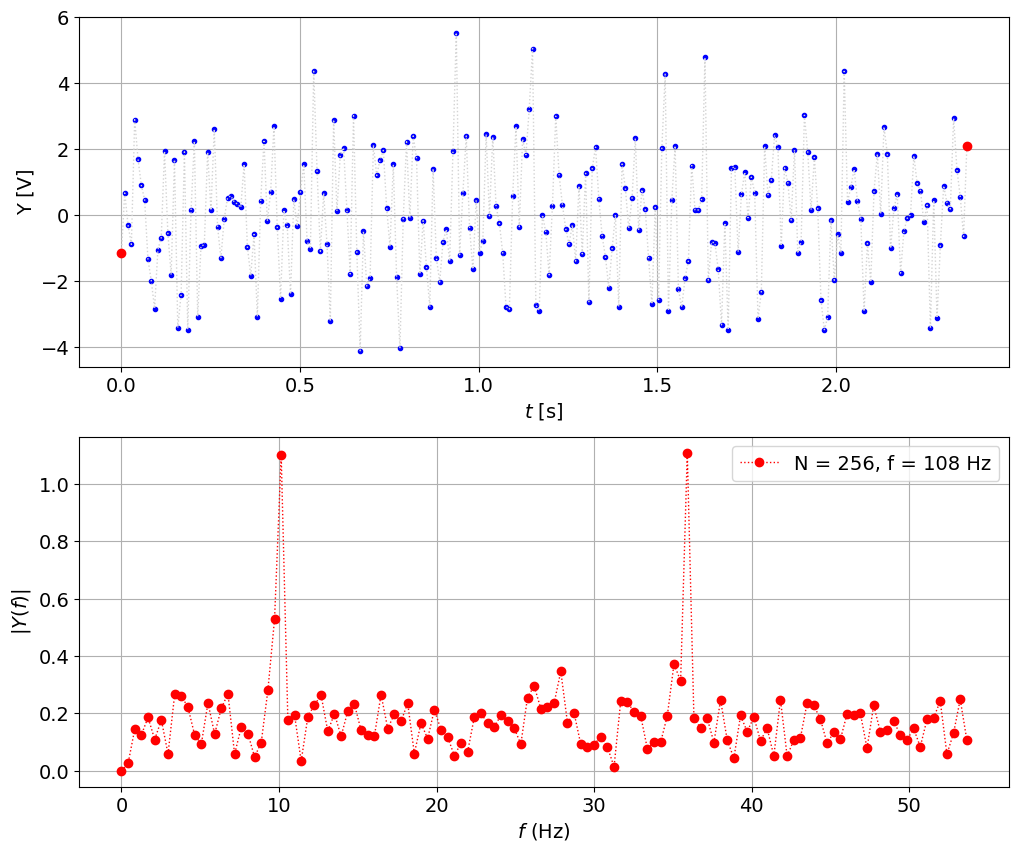

In [11]:
fs = 108.16 # sampling frequency, Hz
N = 256 # number of sampling points
t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)

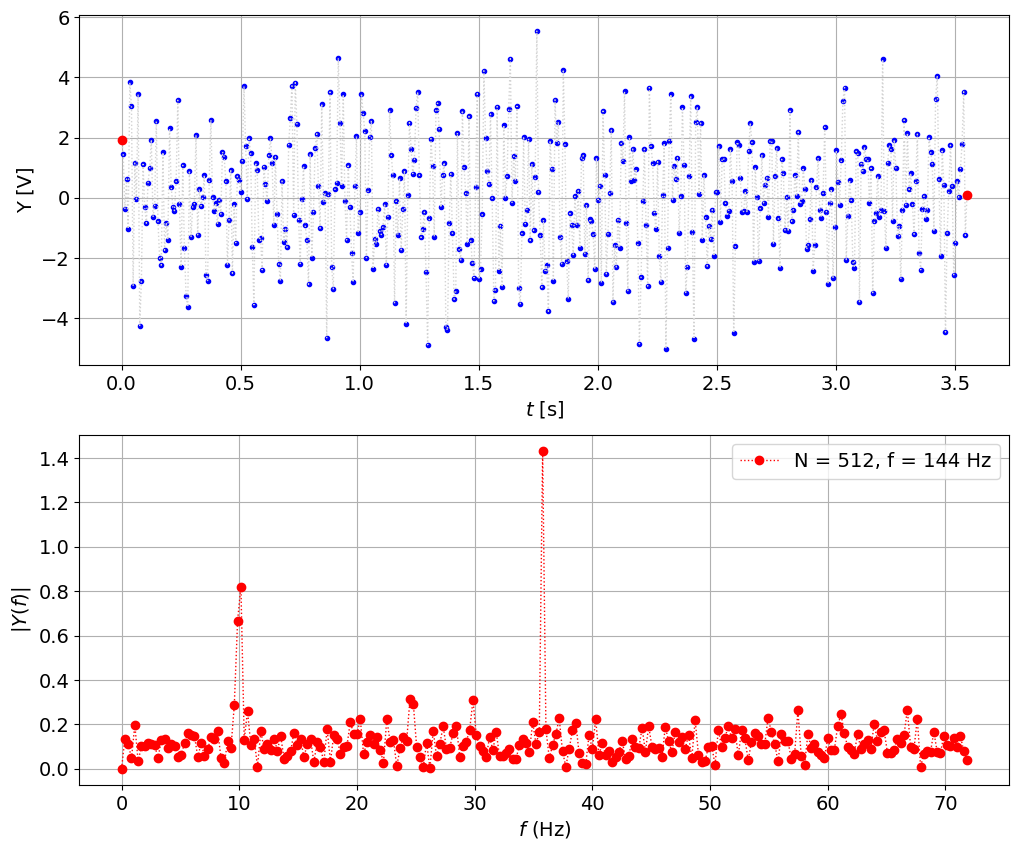

In [12]:
fs = 144.22 # sampling frequency, Hz
N = 512 # number of sampling points
t,y = create_signal(fs,N)
plot_signal_with_fft(t,y,fs,N)

## Use windowing or low-pass filtering
    

In [13]:
from scipy.signal import hann  # Hanning window

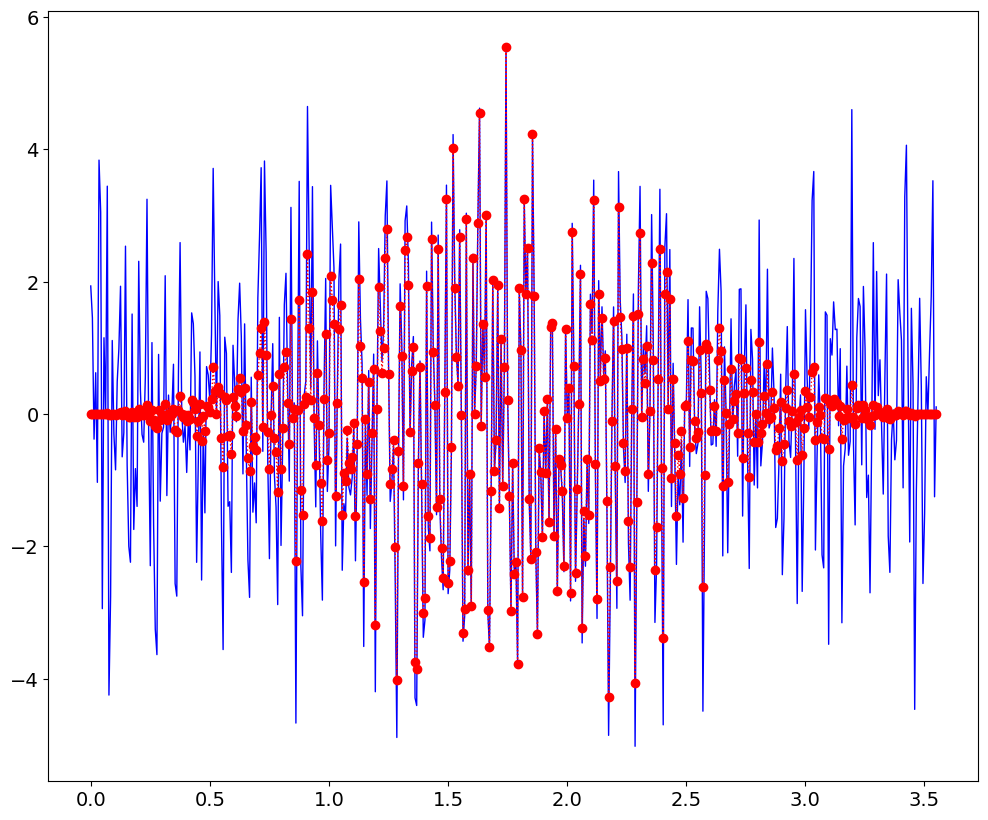

In [14]:
# we made a mistake with the DC

DC = y.mean()
y -= DC


yh = y*hann(len(y))

plt.plot(t,y,'b-',t,yh,'r') 

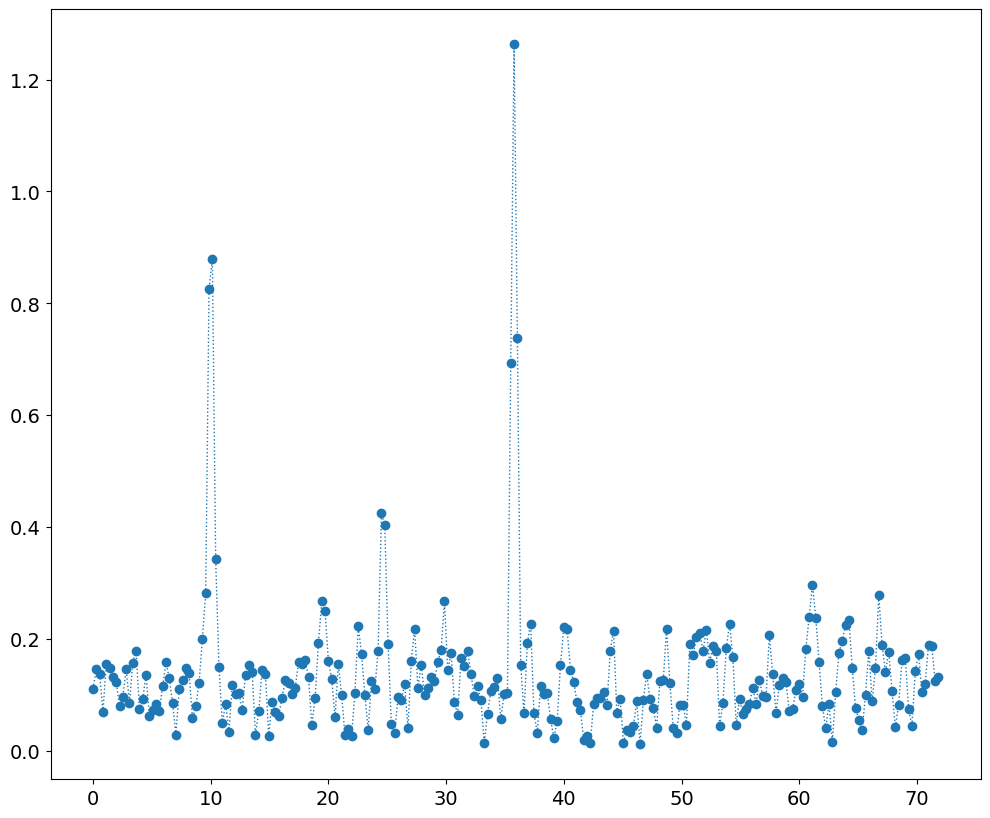

In [15]:
frq,Y = spectrum(yh,fs)

Y = abs(Y)*sqrt(8./3.)# /(N/2) 

plt.plot(frq,Y)


### let's try to reconstruct

In [16]:
a1,f1 = Y.max(),frq[Y.argmax()]
print (a1,f1)
b = Y.copy()
b[:Y.argmax()+10] = 0 # remove the first peak
a2,f2 = b.max(),frq[b.argmax()]
print (a2,f2)

1.2630873456023635 35.7733203125
0.29723680099060673 61.124492187499996


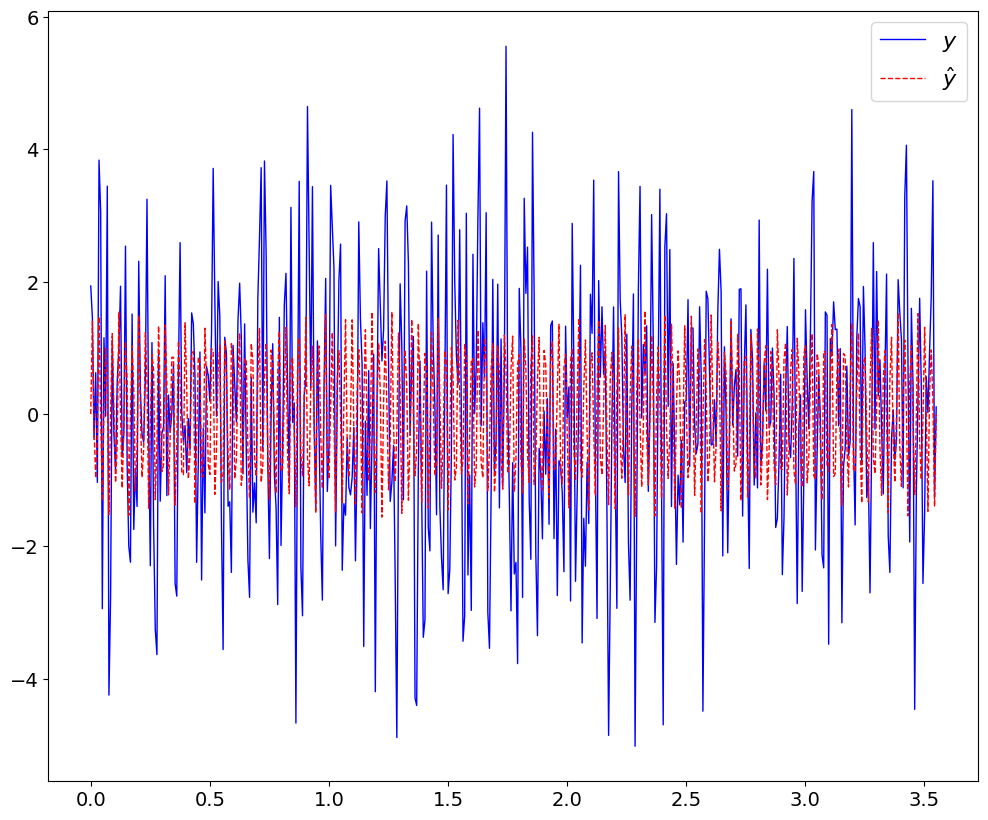

In [17]:
yhat = DC + a1*sin(2*pi*f1*t) + a2*sin(2*pi*f2*t)
plt.plot(t,y+DC,'b-',t,yhat,'r--');
plt.legend(('$y$','$\hat{y}$'),fontsize=16);